# **Experiment 01 (Base experiment)**

## **Name: Fahim Shahriar**
### Github: https://github.com/FahimS45

### Dataset description: https://archive.ics.uci.edu/dataset/2/adult
### Dataset link: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score


# Ensure matplotlib inline plotting for Jupyter Notebooks
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
data = pd.read_csv('adult.csv', na_values="?", skipinitialspace=True)

In [3]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
data.tail(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48832,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
48833,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
48834,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
data.shape

(48842, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
data.nunique()

age                   74
workclass              8
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            14
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        41
income                 2
dtype: int64

In [8]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [9]:
def null_percentage (df):

    df_len = df.shape[0]
    columns = df.columns
    total_null_count = 0

    for each in columns:
        null_count = df[each].isnull().sum()
        if null_count != 0.0:
            null_per = (df[each].isnull().sum() / df_len) * 100
            print(f'Null value percentage in {each} is : {null_per: .2f}')
            total_null_count = total_null_count + null_count
            
    if total_null_count == 0:
        print(f'No null value exist.')

In [10]:
null_percentage(data)

Null value percentage in workclass is :  5.73
Null value percentage in occupation is :  5.75
Null value percentage in native-country is :  1.75


In [11]:
def cat_cols(df):

    categorical_cols = df.select_dtypes(include=['object']).columns
    total_cat_cols = len(categorical_cols)
    total_cols = df.shape[1]

    if total_cat_cols != 0: 
        print(f'Total categorical column {total_cat_cols} out of {total_cols} and they are as follows: ')

        for each in categorical_cols:
            print(each)

        for each in categorical_cols:
            unique_vals = df[each].unique()
            print(f'Feature {each} has {len(unique_vals)} unique values which are: {unique_vals}\n')

In [12]:
cat_cols(data)

Total categorical column 9 out of 15 and they are as follows: 
workclass
education
marital-status
occupation
relationship
race
gender
native-country
income
Feature workclass has 9 unique values which are: ['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

Feature education has 16 unique values which are: ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

Feature marital-status has 7 unique values which are: ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

Feature occupation has 15 unique values which are: ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' nan
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed

### **Apply Label encoder**

In [16]:
df = data.copy()

label_encoder = LabelEncoder()

# Function to apply label encoding ignoring missing values
def label_encode_column(column):

    placeholder = 'missing'
    temp_col = column.fillna(placeholder)
    
    encoded_col = label_encoder.fit_transform(temp_col)
    
    encoded_col = pd.Series(encoded_col, index=column.index)
    encoded_col[column.isna()] = np.nan
    
    return encoded_col

for column in df.columns:
    df[column] = label_encode_column(df[column])

df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,3.0,19329,1,6,4,6.0,3,2,1,0,0,39,38.0,0
1,21,3.0,4212,11,8,2,4.0,0,4,1,0,0,49,38.0,0
2,11,1.0,25340,7,11,2,10.0,0,4,1,0,0,39,38.0,1
3,27,3.0,11201,15,9,2,6.0,0,2,1,98,0,39,38.0,1
4,1,NaN,5411,15,9,4,NaN,3,4,0,0,0,29,38.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,10,3.0,21582,7,11,2,12.0,5,4,0,0,0,37,38.0,0
48838,23,3.0,10584,11,8,2,6.0,0,4,1,0,0,39,38.0,1
48839,41,3.0,10316,11,8,6,0.0,4,4,0,0,0,39,38.0,0
48840,5,3.0,16813,11,8,4,0.0,3,4,1,0,0,19,38.0,0


### **Data Visualization**

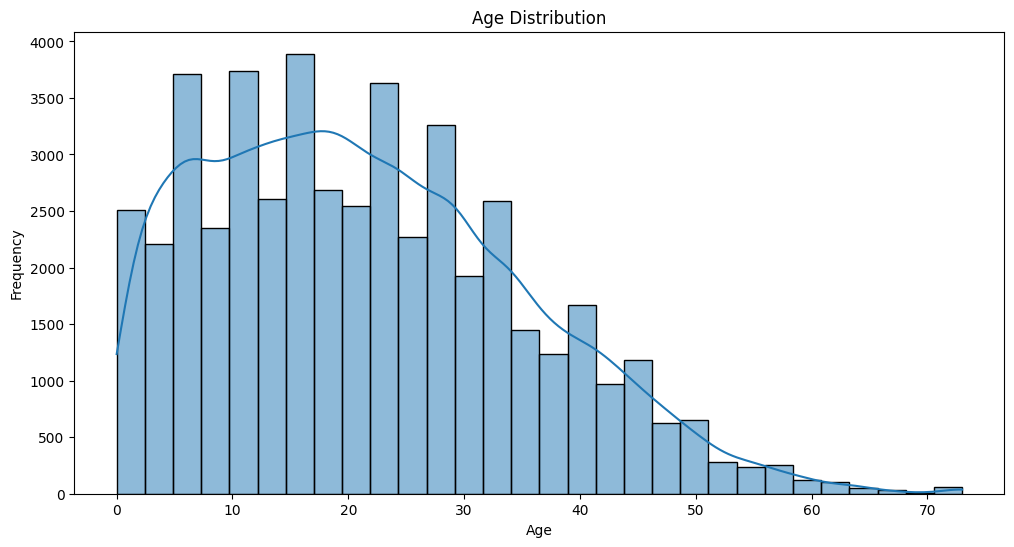

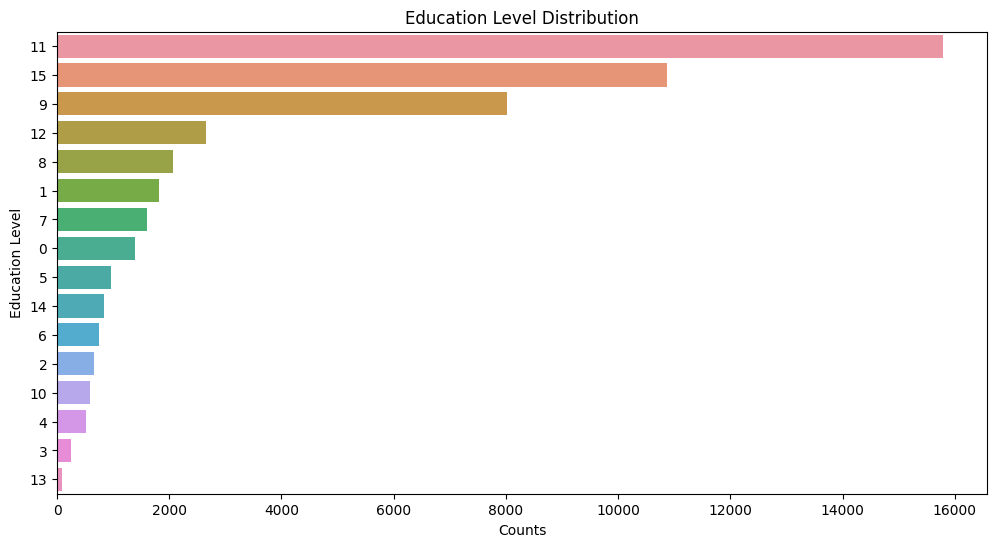

In [17]:
# Histogram for age
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Bar chart for education level
plt.figure(figsize=(12, 6))
sns.countplot(y='education', data=df, order = df['education'].value_counts().index)
plt.title('Education Level Distribution')
plt.xlabel('Counts')
plt.ylabel('Education Level')
plt.show()


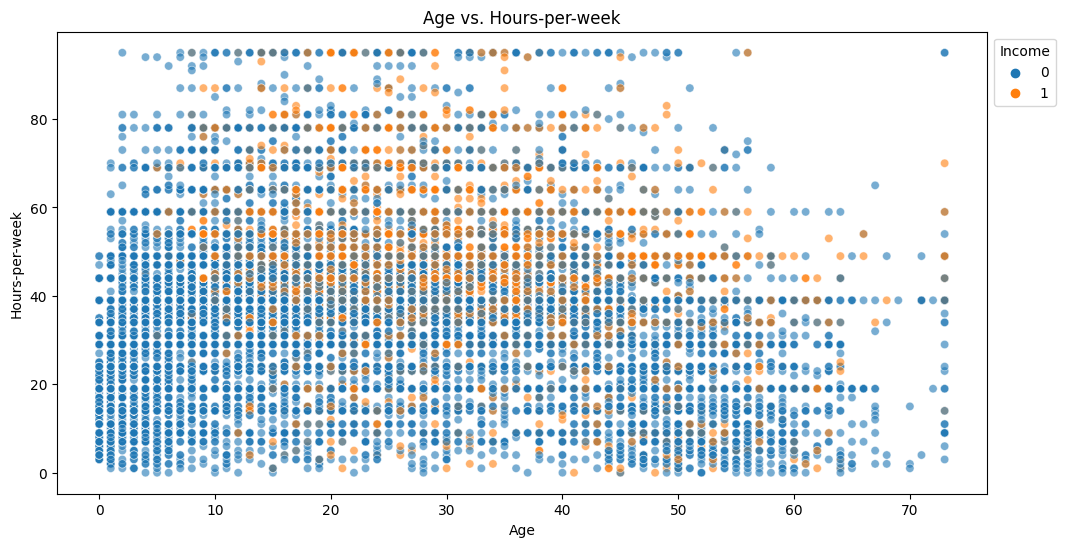

In [18]:
# Scatter plot for age vs hours-per-week
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='hours-per-week', data=df, hue='income', alpha=0.6)

# Customize the legend
plt.legend(title='Income', loc='upper left', bbox_to_anchor=(1, 1))

plt.title('Age vs. Hours-per-week')
plt.xlabel('Age')
plt.ylabel('Hours-per-week')
plt.show()

<Figure size 1200x600 with 0 Axes>

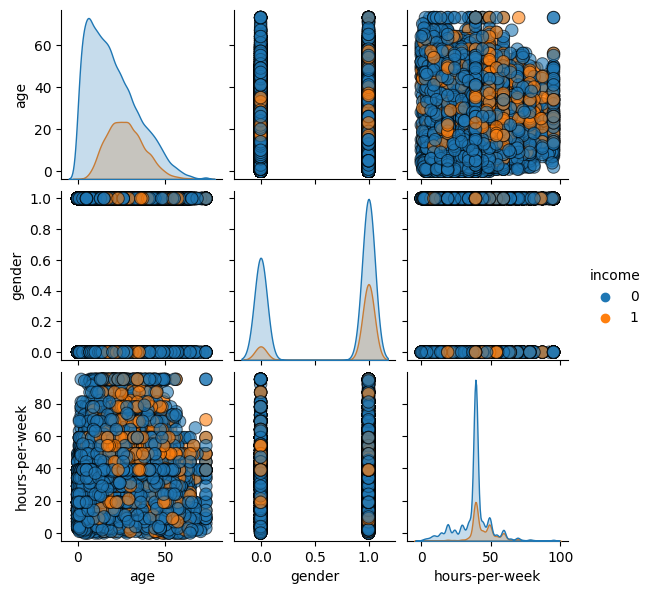

In [19]:
# Pairwise plot -> multi-variate
# Selecting a subset of features for clarity
subset_data = df[['age', 'gender', 'hours-per-week', 'income']]

# Pair plot
plt.figure(figsize=(12, 6))
sns.pairplot(subset_data, hue='income', diag_kind='kde', plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'}, size=2)
plt.show()


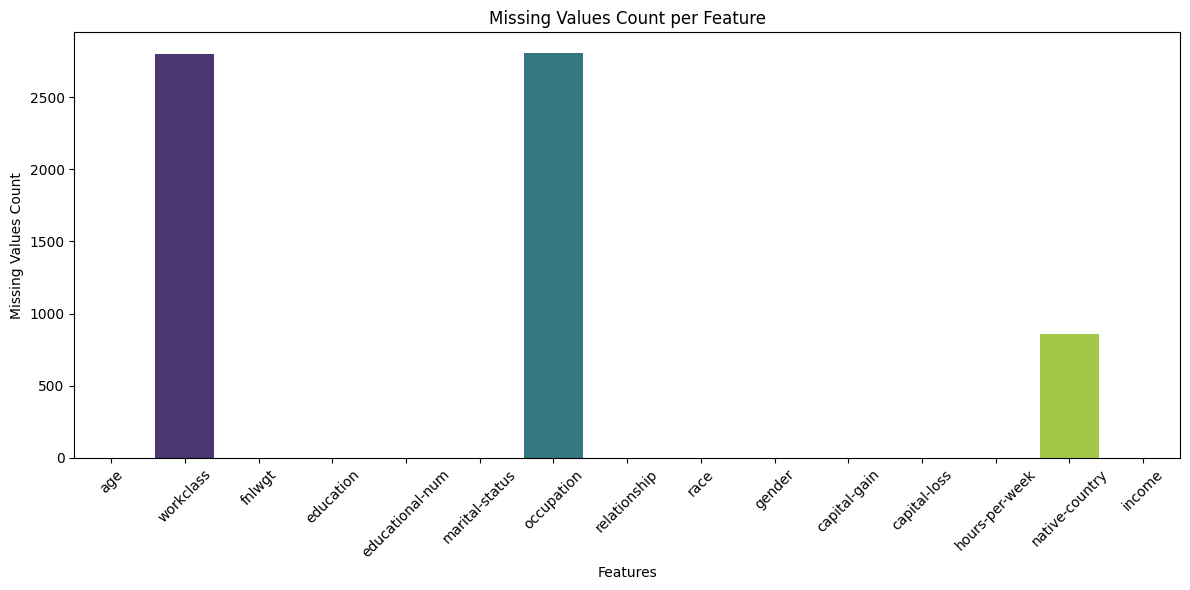

In [20]:
# Visualize null values in bar plot
def null_values_bar_plot(df):

    missing_values = df.isnull().sum()
    plt.figure(figsize=(12, 6))

    ax = sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")

    # Customize the plot
    plt.xlabel('Features')
    plt.ylabel('Missing Values Count')
    plt.title('Missing Values Count per Feature')

    # Angle the x-axis tick labels
    plt.xticks(rotation=45)  # Rotate labels to 45 degrees for better readability

    # Show the plot
    plt.tight_layout()
    plt.show()

null_values_bar_plot(df)


In [21]:
# Drop all the rows that has null values
df.dropna(inplace=True)

In [22]:
null_percentage(df)
print(f"After dropping all the null values' rows, we have: {df.shape}")

No null value exist.
After dropping all the null values' rows, we have: (45222, 15)


### **Train Test Split**

In [23]:
X = df.iloc[:, 0:14]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (36177, 14)
Shape of X_test: (9045, 14)
Shape of y_train: (36177,)
Shape of y_test: (9045,)


### **Pipelines of all the models and operations**

In [26]:
# Define pipelines for different models
pipelines = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()), 
        ('classifier', LogisticRegression(random_state=42))
    ]),
    'Support Vector Classifier': Pipeline([
        ('scaler', StandardScaler()),  
        ('classifier', SVC(random_state=42))
    ]),
    'Decision Tree': Pipeline([
        ('scaler', StandardScaler()),  
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),  
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'AdaBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', AdaBoostClassifier(random_state=42))
    ]),
    'GradientBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', XGBClassifier(random_state=42))
    ]),
    'LightGBM': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LGBMClassifier(random_state=42))
    ]),
    'Naive Bayes': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', GaussianNB())
    ]),
    'KNN': Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier(n_neighbors=189))
    ]),
    'Bagging': Pipeline([
        ('scaler', StandardScaler()),
        ('BaggingClassifier', BaggingClassifier(random_state=42))
    ])
}

In [27]:
from sklearn import set_config
set_config(display='diagram')
pipelines


{'Logistic Regression': Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier', LogisticRegression(random_state=42))]),
 'Support Vector Classifier': Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier', SVC(random_state=42))]),
 'Decision Tree': Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier', DecisionTreeClassifier(random_state=42))]),
 'Random Forest': Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier', RandomForestClassifier(random_state=42))]),
 'AdaBoost': Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier', AdaBoostClassifier(random_state=42))]),
 'GradientBoost': Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier', GradientBoostingClassifier(random_state=42))]),
 'XGBoost': Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier',
                  XGBClassifier(base_score=None, booster=None, callbacks=None,
 

Logistic Regression Accuracy: 0.81

Logistic Regression Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      6773
           1       0.69      0.46      0.55      2272

    accuracy                           0.81      9045
   macro avg       0.76      0.69      0.72      9045
weighted avg       0.80      0.81      0.80      9045



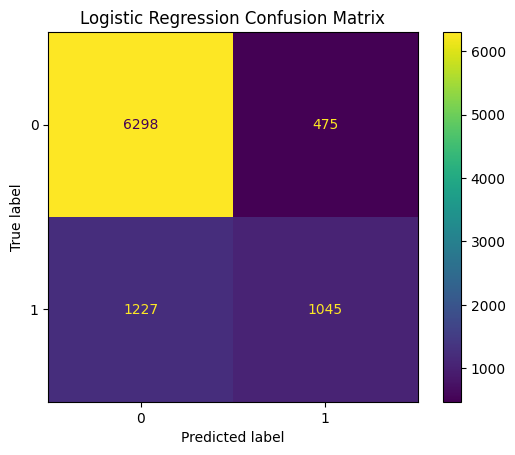

----------------------------------------------------------------------------
Support Vector Classifier Accuracy: 0.84

Support Vector Classifier Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      6773
           1       0.74      0.55      0.63      2272

    accuracy                           0.84      9045
   macro avg       0.80      0.74      0.76      9045
weighted avg       0.83      0.84      0.83      9045



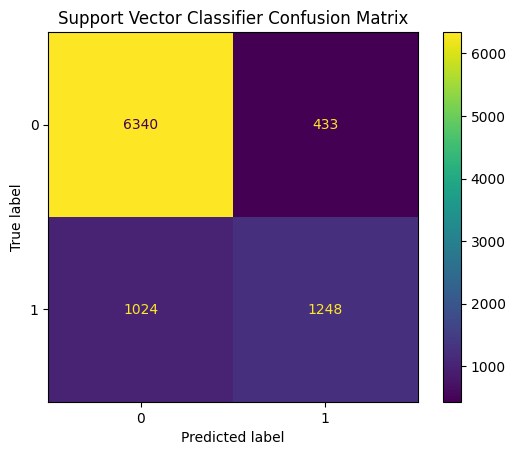

----------------------------------------------------------------------------
Decision Tree Accuracy: 0.81

Decision Tree Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6773
           1       0.62      0.62      0.62      2272

    accuracy                           0.81      9045
   macro avg       0.74      0.75      0.74      9045
weighted avg       0.81      0.81      0.81      9045



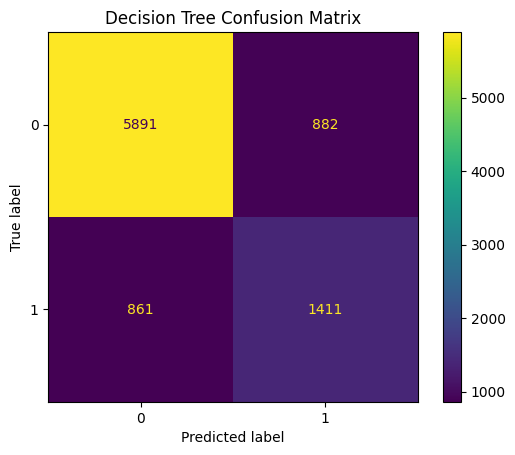

----------------------------------------------------------------------------
Random Forest Accuracy: 0.85

Random Forest Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      6773
           1       0.74      0.62      0.68      2272

    accuracy                           0.85      9045
   macro avg       0.81      0.77      0.79      9045
weighted avg       0.85      0.85      0.85      9045



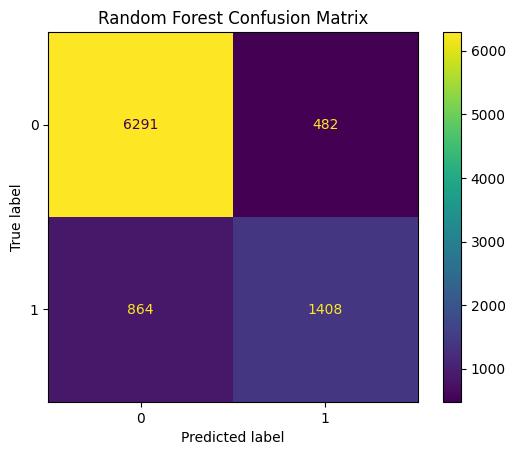

----------------------------------------------------------------------------
AdaBoost Accuracy: 0.85

AdaBoost Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6773
           1       0.75      0.59      0.66      2272

    accuracy                           0.85      9045
   macro avg       0.81      0.76      0.78      9045
weighted avg       0.84      0.85      0.84      9045



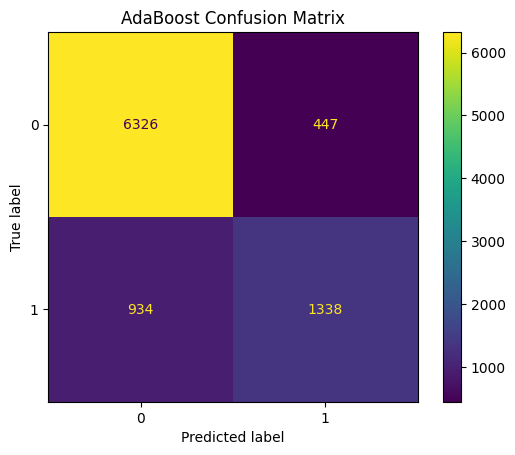

----------------------------------------------------------------------------
GradientBoost Accuracy: 0.85

GradientBoost Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      6773
           1       0.78      0.58      0.66      2272

    accuracy                           0.85      9045
   macro avg       0.82      0.76      0.79      9045
weighted avg       0.85      0.85      0.85      9045



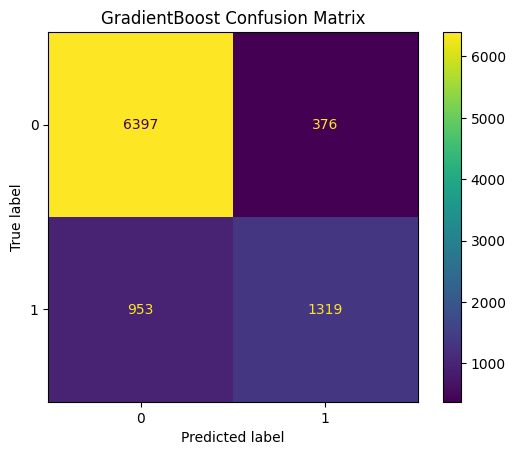

----------------------------------------------------------------------------
XGBoost Accuracy: 0.86

XGBoost Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6773
           1       0.77      0.65      0.71      2272

    accuracy                           0.86      9045
   macro avg       0.83      0.79      0.81      9045
weighted avg       0.86      0.86      0.86      9045



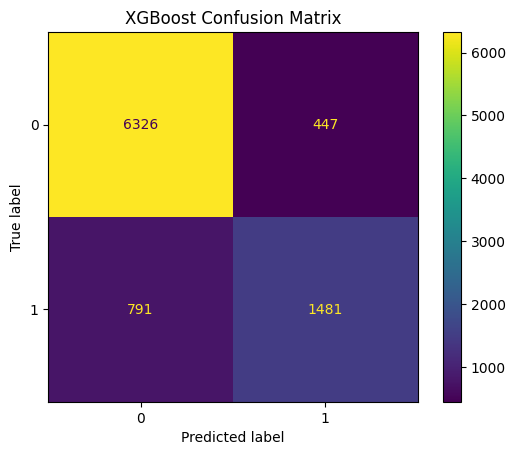

----------------------------------------------------------------------------
[LightGBM] [Info] Number of positive: 8936, number of negative: 27241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 36177, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.247008 -> initscore=-1.114635
[LightGBM] [Info] Start training from score -1.114635
LightGBM Accuracy: 0.86

LightGBM Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6773
           1       0.77      0.65      0.71      2272

    accuracy                           0.86      9045
   macro avg       0.83      0.79      0.81      9045
weighted avg       0.86      0.86    

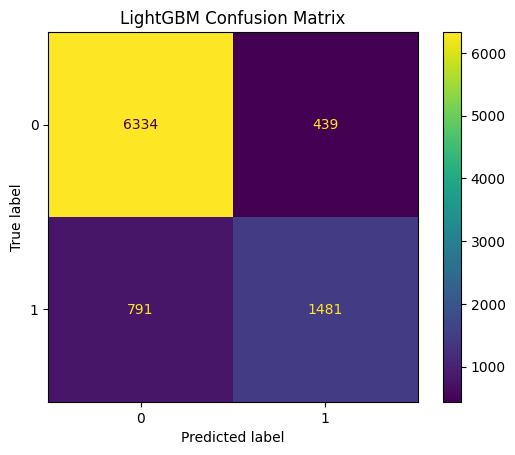

----------------------------------------------------------------------------
Naive Bayes Accuracy: 0.81

Naive Bayes Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      6773
           1       0.67      0.47      0.55      2272

    accuracy                           0.81      9045
   macro avg       0.75      0.70      0.72      9045
weighted avg       0.80      0.81      0.80      9045



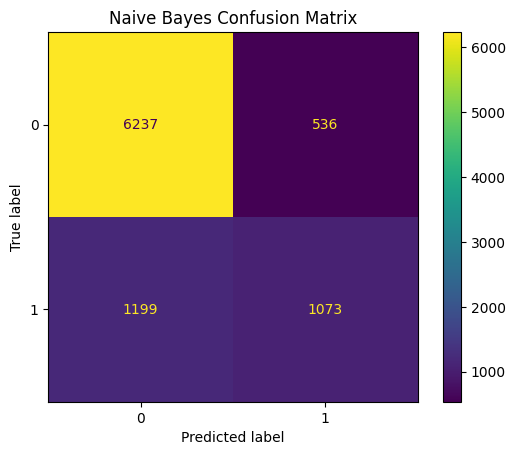

----------------------------------------------------------------------------
KNN Accuracy: 0.82

KNN Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6773
           1       0.68      0.55      0.61      2272

    accuracy                           0.82      9045
   macro avg       0.77      0.73      0.75      9045
weighted avg       0.81      0.82      0.82      9045



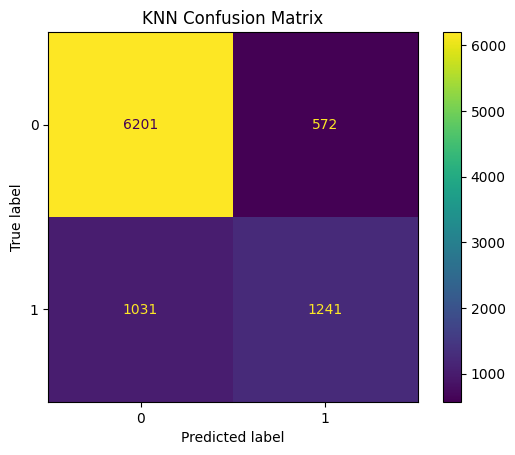

----------------------------------------------------------------------------
Bagging Accuracy: 0.84

Bagging Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6773
           1       0.74      0.58      0.65      2272

    accuracy                           0.84      9045
   macro avg       0.80      0.76      0.77      9045
weighted avg       0.84      0.84      0.84      9045



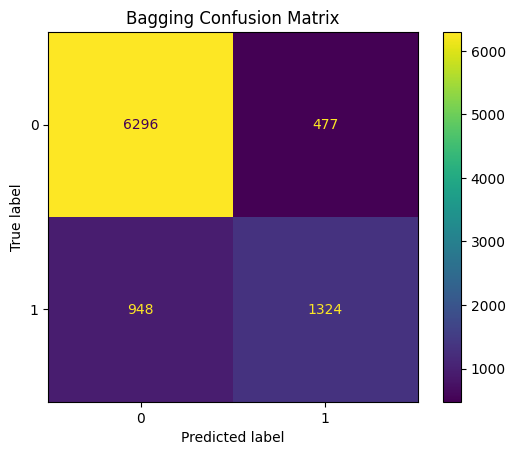

----------------------------------------------------------------------------


In [28]:
metrics = {
    'Accuracy': accuracy_score,
    'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred, average='weighted'),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='weighted'),
    'F1 Score': lambda y_true, y_pred: f1_score(y_true, y_pred, average='weighted')
}

results = {metric: {} for metric in metrics}

for model_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.2f}\n')
    print(f'{model_name} Classification Report: \n{classification_report(y_test, y_pred)}')
    cm = confusion_matrix(y_test, y_pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    for metric_name, metric_func in metrics.items():
        results[metric_name][model_name] = metric_func(y_test, y_pred)

    print('----------------------------------------------------------------------------')

In [29]:
results_df = pd.DataFrame(results)
results_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.811830,0.799405,0.811830,0.798120
Support Vector Classifier,0.838917,0.831172,0.838917,0.830242
Decision Tree,0.807297,0.807894,0.807297,0.807590
Random Forest,0.851189,0.845518,0.851189,0.846400
AdaBoost,0.847319,0.840763,0.847319,0.840804
GradientBoost,0.853068,0.847188,0.853068,0.845384
XGBoost,0.863129,0.858538,0.863129,0.859218
LightGBM,0.864013,0.859436,0.864013,0.860026
Naive Bayes,0.808181,0.795582,0.808181,0.796272
KNN,0.822775,0.813999,0.822775,0.815722
